In [29]:
if (!require("dplyr")) { install.packages("dplyr", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("tidyr")) { install.packages("tidyr", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("ggplot2")) { install.packages("ggplot2", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("purrr")) { install.packages("purrr", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("corrplot")) { install.packages("corrplot", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("data.table")) { install.packages("data.table", lib='/R/library', repos='http://cran.us.r-project.org') }

library(tidyr)
library(ggplot2)
library(lubridate)
library(magrittr)
library(corrplot)
library(data.table)

In [49]:
load('IndigoData.dat')
str(data)
summary(data)

'data.frame':	1211693 obs. of  22 variables:
 $ event_RowNumber: num  1.58e+10 1.58e+10 1.58e+10 1.58e+10 1.58e+10 ...
 $ event_press    : int  45000586 45000586 45000586 45000586 45000586 45000586 45000586 45000588 45000588 45000075 ...
 $ Product_Line   : Factor w/ 3 levels "HP Indigo 7000",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ series         : Factor w/ 1 level "7000 Family Sheet Fed Commercial Press": 1 1 1 1 1 1 1 1 1 1 ...
 $ Region         : Factor w/ 2 levels "Europe, Middle East & Africa",..: 2 2 2 2 2 2 2 1 1 1 ...
 $ SubRegion      : Factor w/ 15 levels "Benelux","Canada",..: 9 9 9 9 9 9 9 14 14 5 ...
 $ District       : Factor w/ 12 levels "BELGIUM","Canada",..: 12 12 12 12 12 12 12 11 11 3 ...
 $ Ownership      : Factor w/ 1 level "DIRECT": 1 1 1 1 1 1 1 1 1 1 ...
 $ event_recNum   : int  739828 739878 740037 740221 740224 740554 740770 1417945 1418352 744504 ...
 $ event_date     : chr  "2016-06-08 00:00:00.000" "2016-06-08 00:00:00.000" "2016-06-08 00:00:00.000" "2016-06-08 00:

 event_RowNumber      event_press               Product_Line   
 Min.   :1.426e+10   Min.   :40000024   HP Indigo 7000:300205  
 1st Qu.:1.470e+10   1st Qu.:43000005   HP Indigo 7500:364286  
 Median :1.512e+10   Median :43000380   HP Indigo 7600:547202  
 Mean   :1.512e+10   Mean   :43160217                          
 3rd Qu.:1.555e+10   3rd Qu.:45000297                          
 Max.   :1.610e+10   Max.   :45000597                          
                                                               
                                    series       
 7000 Family Sheet Fed Commercial Press:1211693  
                                                 
                                                 
                                                 
                                                 
                                                 
                                                 
                          Region                           SubRegion     
 Europe, Middl


   HOLD_STATE     OFF_STATE   PRINT_STATE   READY_STATE STANDBY_STATE 
           10            11        203675       1007937            60 

,PIP_Temperature,IO_temperature,IO_dirtiness,vessel_flow,IO_Conductivity,CS_Voltage,Delta_Pressure
PIP_Temperature,1.00000000,0.25934923,-0.05202092,NA,NA,0.08381129,0.07949715
IO_temperature,0.25934923,1.00000000,-0.06674291,NA,NA,0.17828677,-0.13908384
IO_dirtiness,-0.05202092,-0.06674291,1.00000000,NA,NA,-0.16800718,0.08656107
vessel_flow,NA,NA,NA,1,NA,NA,NA
IO_Conductivity,NA,NA,NA,NA,1,NA,NA
CS_Voltage,0.08381129,0.17828677,-0.16800718,NA,NA,1.00000000,-0.08787643
Delta_Pressure,0.07949715,-0.13908384,0.08656107,NA,NA,-0.08787643,1.00000000


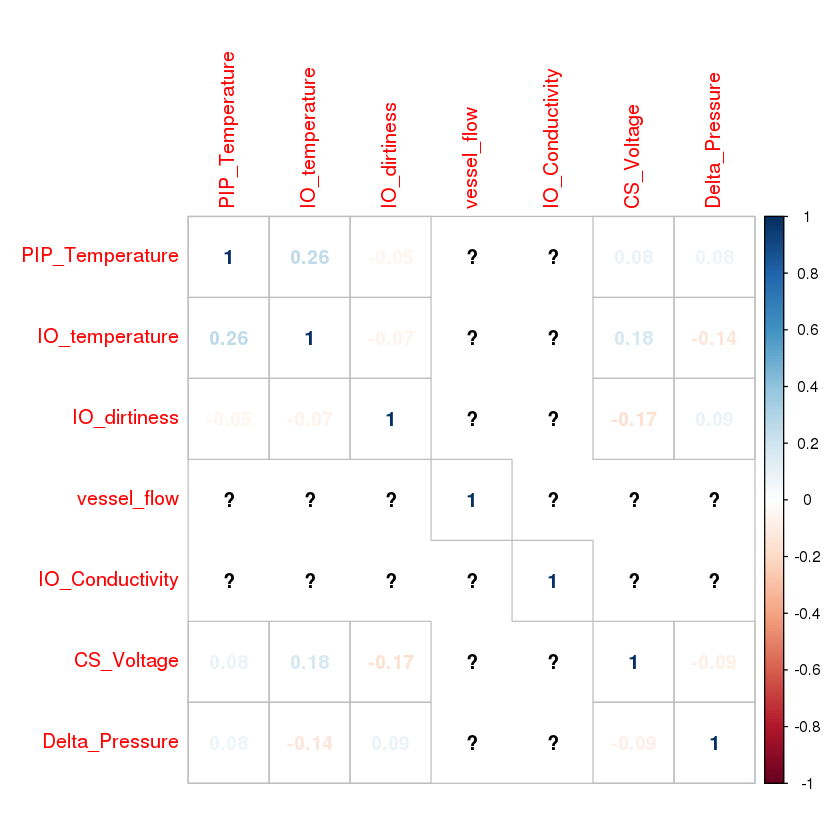

In [38]:
#data = na.omit(data)

table(data$event_state)
cor(data[15:21])
COR=cor(data[15:21])
corrplot(COR, method="number")


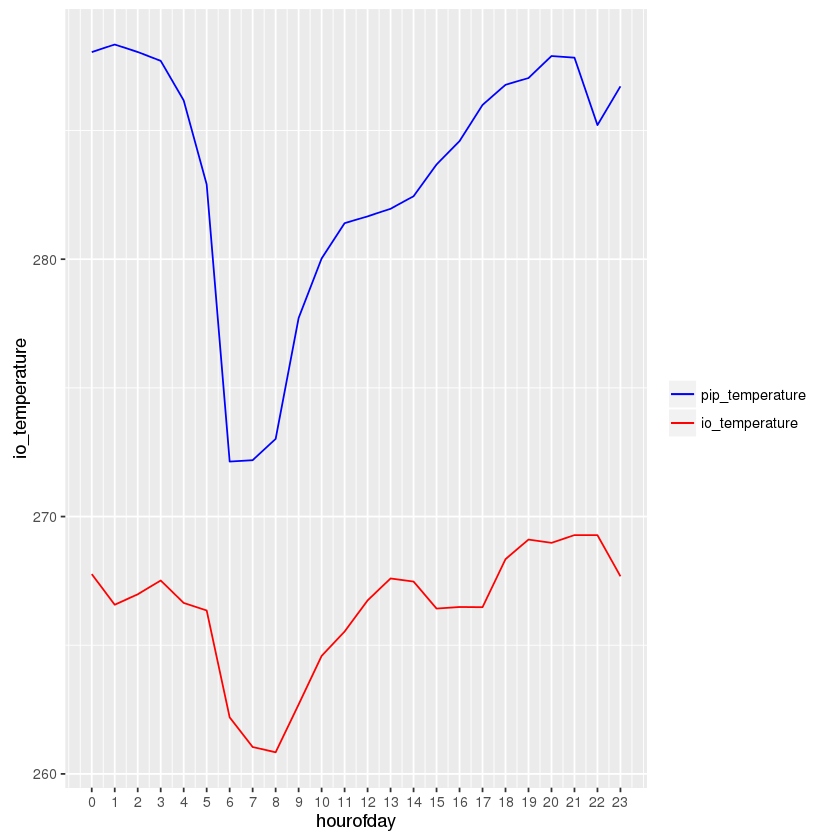

In [39]:
data$time = hour(ymd_hms(data$full_time))

time_result = aggregate(list(pip_temperature = data$PIP_Temperature, io_temperature = data$IO_temperature),
                   list(hourofday = data$time),
                   mean)

ggplot(time_result, aes(x = hourofday, group = 1)) +
  geom_line(aes(y = io_temperature, colour = "io_temperature")) +
  geom_line(aes(y = pip_temperature, colour = "pip_temperature")) +
  scale_colour_manual("", 
                      breaks = c( "pip_temperature", "io_temperature"),
                      values = c("red", "blue")) +
  scale_x_continuous(breaks=seq(0, 23, 1))    


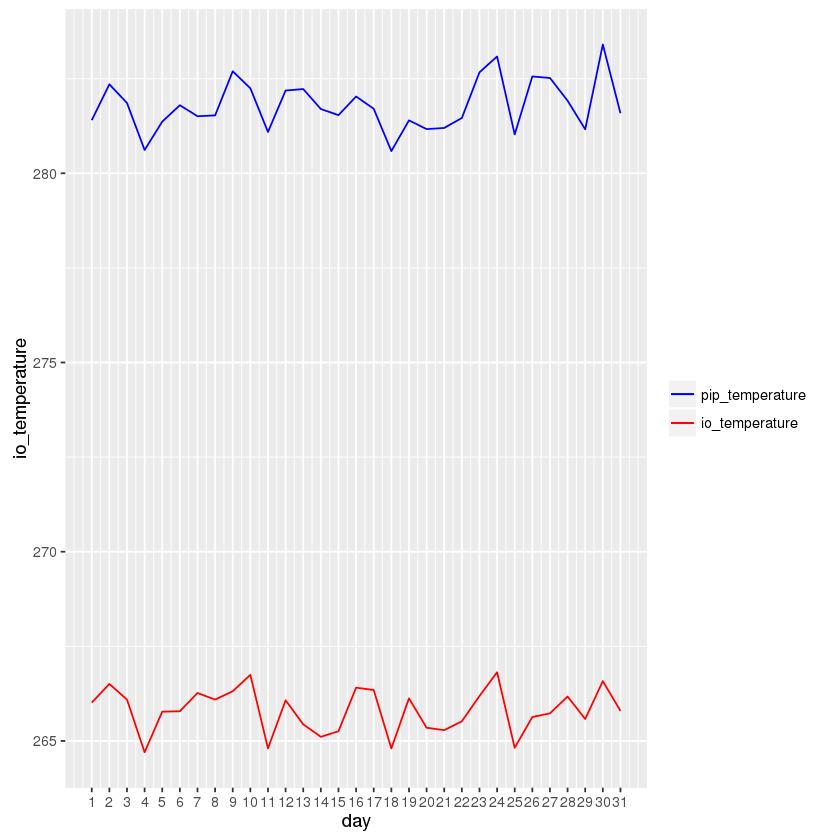

In [24]:
data$day = day(ymd_hms(data$full_time))


day_result = aggregate(list(pip_temperature = data$PIP_Temperature, io_temperature = data$IO_temperature),
                   list(day = data$day),
                   mean)


ggplot(day_result, aes(x = day, group = 1)) +
  geom_line(aes(y = io_temperature, colour = "io_temperature")) +
  geom_line(aes(y = pip_temperature, colour = "pip_temperature")) +
  scale_colour_manual("", 
                      breaks = c( "pip_temperature", "io_temperature"),
                      values = c("red", "blue")) +
  scale_x_continuous(breaks=seq(1, 31, 1))    

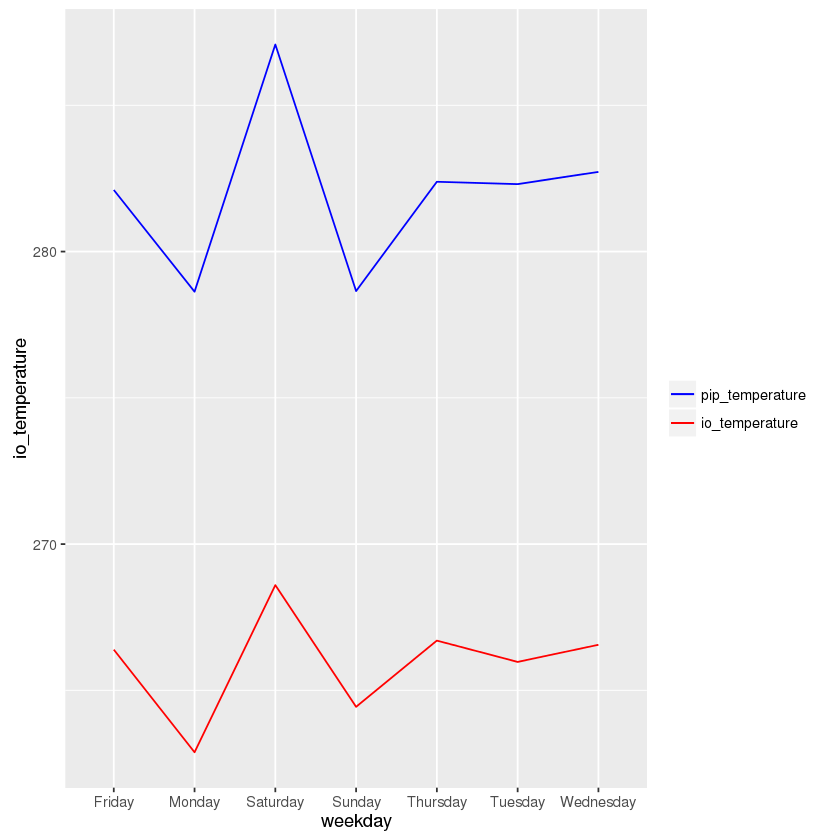

In [40]:
data$weekday = weekdays(ymd_hms(data$full_time))


weekday_result = aggregate(list( pip_temperature = data$PIP_Temperature, io_temperature = data$IO_temperature),
                       list(weekday = data$weekday),
                       mean)



ggplot(weekday_result, aes(x = weekday, group = 1)) +
  geom_line(aes(y = io_temperature, colour = "io_temperature")) +
  geom_line(aes(y = pip_temperature, colour = "pip_temperature")) +
  scale_colour_manual("", 
                      breaks = c( "pip_temperature", "io_temperature"),
                      values = c("red", "blue")) 

In [50]:
states = split(data, data$event_state)

PRINT_STATE = states$PRINT_STATE

data = na.omit(PRINT_STATE)

summary(data)

 event_RowNumber      event_press               Product_Line  
 Min.   :1.427e+10   Min.   :43000003   HP Indigo 7000:    0  
 1st Qu.:1.471e+10   1st Qu.:45000123   HP Indigo 7500:14225  
 Median :1.514e+10   Median :45000302   HP Indigo 7600:83872  
 Mean   :1.513e+10   Mean   :44710321                         
 3rd Qu.:1.556e+10   3rd Qu.:45000445                         
 Max.   :1.606e+10   Max.   :45000597                         
                                                              
                                    series     
 7000 Family Sheet Fed Commercial Press:98097  
                                               
                                               
                                               
                                               
                                               
                                               
                          Region                        SubRegion    
 Europe, Middle East & Africa:36729   Cent

,PIP_Temperature,IO_temperature,IO_dirtiness,vessel_flow,IO_Conductivity,CS_Voltage,Delta_Pressure
PIP_Temperature,1.00000000,0.65818480,0.01524372,-0.12119315,0.02660130,0.34993069,0.01529180
IO_temperature,0.65818480,1.00000000,0.03170640,-0.24198236,-0.02070169,0.40229166,-0.03016180
IO_dirtiness,0.01524372,0.03170640,1.00000000,-0.04221223,-0.02372499,-0.02257012,0.03397870
vessel_flow,-0.121193154,-0.241982361,-0.042212230,1.000000000,-0.018828929,0.118878071,-0.006055515
IO_Conductivity,0.02660130,-0.02070169,-0.02372499,-0.01882893,1.00000000,-0.03024335,0.04453331
CS_Voltage,0.34993069,0.40229166,-0.02257012,0.11887807,-0.03024335,1.00000000,-0.06626687
Delta_Pressure,0.015291795,-0.030161798,0.033978696,-0.006055515,0.044533305,-0.066266872,1.000000000


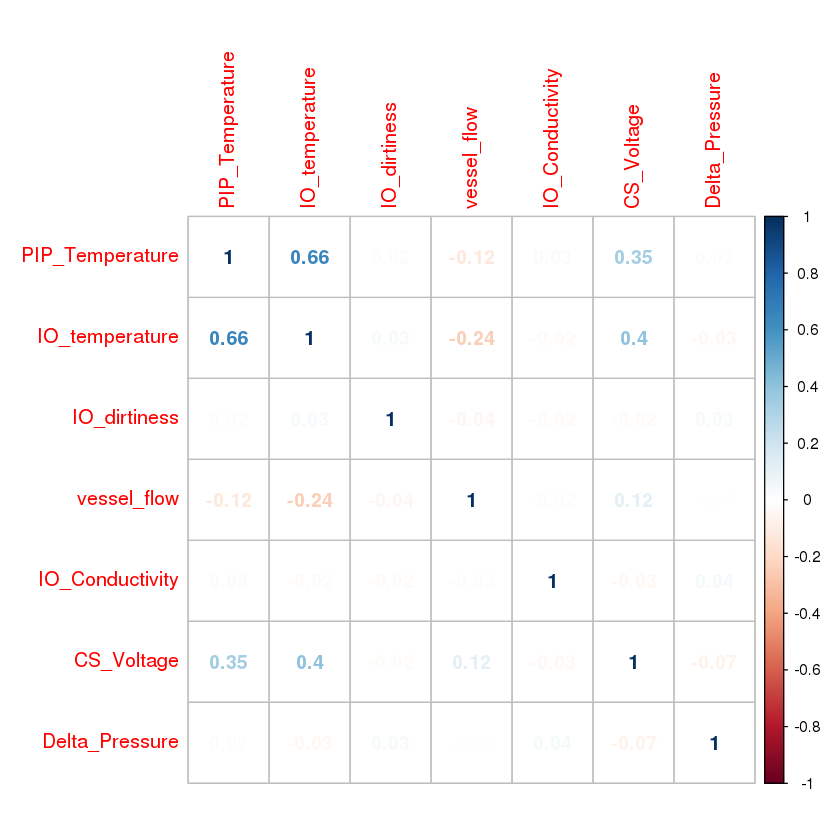

In [42]:
cor(data[15:21])
COR=cor(data[15:21])
corrplot(COR, method="number")

   hourofday pip_temperature io_temperature
1          0        300.5011       257.2492
2          1        300.0334       255.9110
3          2        301.6089       256.4220
4          3        301.2993       257.9444
5          4        303.0646       260.4308
6          5        301.0889       259.0550
7          6        299.2951       256.8785
8          7        297.7984       255.2062
9          8        297.5031       255.0708
10         9        296.6327       254.3570
11        10        296.7894       254.1618
12        11        296.9240       254.2120
13        12        297.2171       255.2639
14        13        297.4385       254.5036
15        14        297.7439       254.7545
16        15        297.0274       253.2762
17        16        297.2411       254.1646
18        17        299.2057       256.4691
19        18        300.8532       258.1398
20        19        300.7035       257.6620
21        20        301.1566       258.1234
22        21        301.7576    

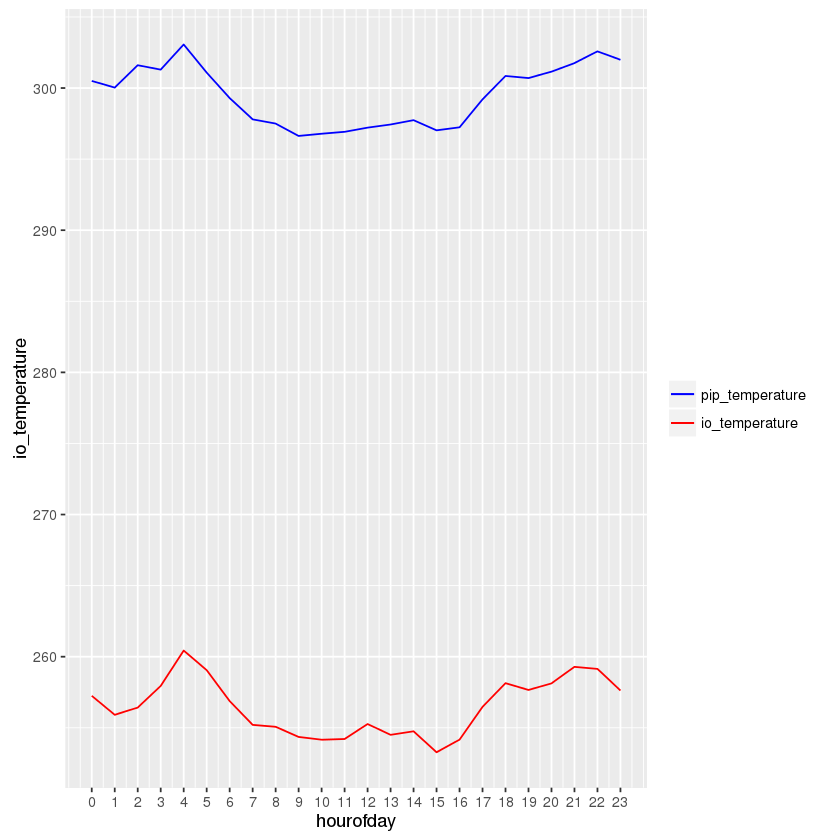

In [48]:
data$time = hour(ymd_hms(data$full_time))

time_result = aggregate(list(pip_temperature = data$PIP_Temperature, io_temperature = data$IO_temperature),
                   list(hourofday = data$time),
                   mean)

print(time_result)

ggplot(time_result, aes(x = hourofday, group = 1)) +
  geom_line(aes(y = io_temperature, colour = "io_temperature")) +
  geom_line(aes(y = pip_temperature, colour = "pip_temperature")) +
  scale_colour_manual("", 
                      breaks = c( "pip_temperature", "io_temperature"),
                      values = c("red", "blue")) +
  scale_x_continuous(breaks=seq(0, 23, 1))   

   day pip_temperature io_temperature
1    1        299.4356       257.0678
2    2        298.3320       256.0000
3    3        298.0184       254.5557
4    4        297.6126       254.6485
5    5        297.7626       256.1447
6    6        298.2488       254.6307
7    7        298.7877       255.2257
8    8        298.4473       255.7862
9    9        298.3865       254.5540
10  10        298.2632       255.0888
11  11        298.5475       255.0303
12  12        298.3263       255.9853
13  13        297.7580       253.9701
14  14        299.5244       256.3343
15  15        299.0977       255.5793
16  16        299.1278       255.5761
17  17        299.0089       257.2488
18  18        298.5258       255.7328
19  19        297.1842       256.1323
20  20        297.8062       255.4205
21  21        298.5579       254.5321
22  22        299.1488       255.3973
23  23        299.7242       256.6504
24  24        299.6723       257.1542
25  25        299.1627       256.6599
26  26      

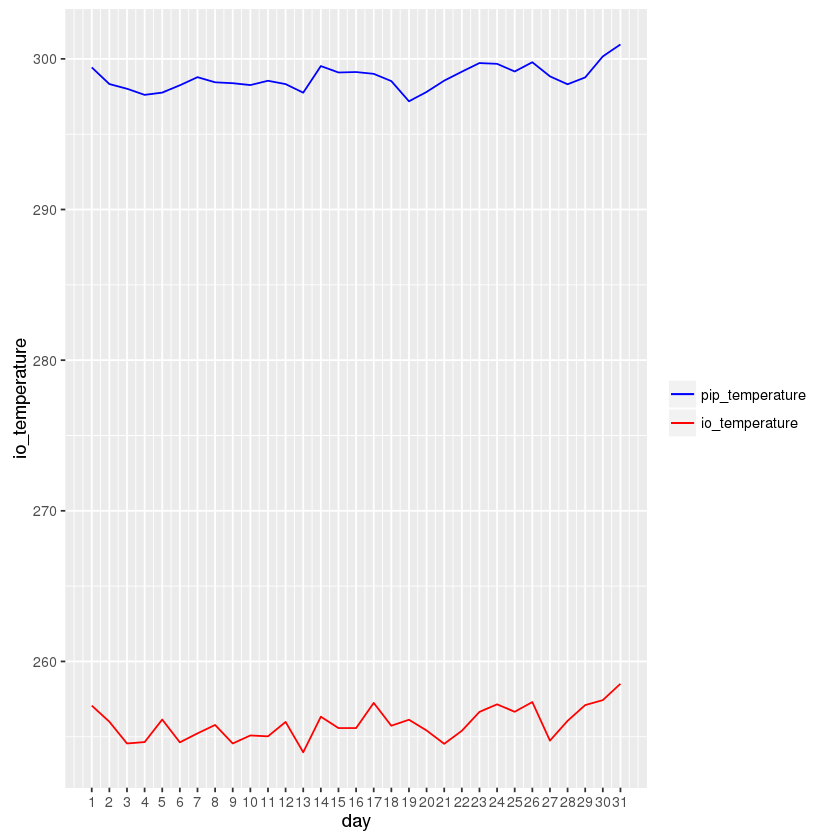

In [47]:
data$day = day(ymd_hms(data$full_time))


day_result = aggregate(list(pip_temperature = data$PIP_Temperature, io_temperature = data$IO_temperature),
                   list(day = data$day),
                   mean)

print(day_result)

ggplot(day_result, aes(x = day, group = 1)) +
  geom_line(aes(y = io_temperature, colour = "io_temperature")) +
  geom_line(aes(y = pip_temperature, colour = "pip_temperature")) +
  scale_colour_manual("", 
                      breaks = c( "pip_temperature", "io_temperature"),
                      values = c("red", "blue")) +
  scale_x_continuous(breaks=seq(1, 31, 1))   

    weekday pip_temperature io_temperature
1    Friday        298.5926       255.9406
2    Monday        297.5856       254.8830
3  Saturday        302.1362       258.2542
4    Sunday        300.6044       257.2935
5  Thursday        298.9360       255.7789
6   Tuesday        298.5618       256.2639
7 Wednesday        298.6047       255.3182


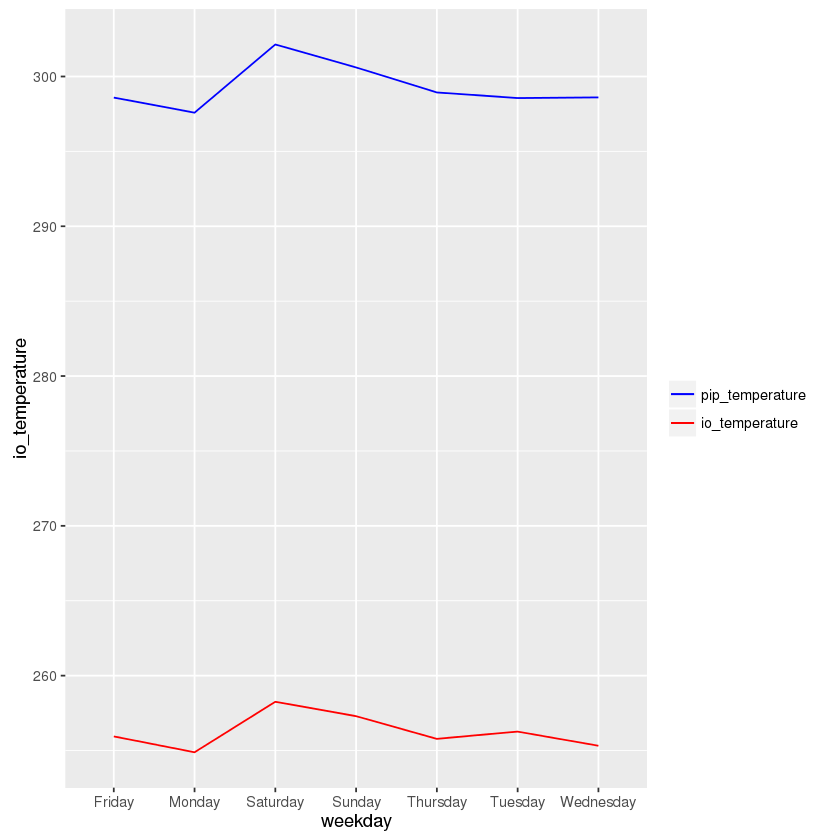

In [46]:
data$weekday = weekdays(ymd_hms(data$full_time))


weekday_result = aggregate(list( pip_temperature = data$PIP_Temperature, io_temperature = data$IO_temperature),
                       list(weekday = data$weekday),
                       mean)


print(weekday_result)

ggplot(weekday_result, aes(x = weekday, group = 1)) +
  geom_line(aes(y = io_temperature, colour = "io_temperature")) +
  geom_line(aes(y = pip_temperature, colour = "pip_temperature")) +
  scale_colour_manual("", 
                      breaks = c( "pip_temperature", "io_temperature"),
                      values = c("red", "blue")) 